In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

<h1>DATA Checks to perform</h1>
<ul>
<li>Check Missing Values</li>
<li>Check Duplicates</li>
<li>Check data type</li>
<li>Check the number of unique values of each column</li>
<li>Check statistics of data set</li>
<li>Check various categories present in the different categorical column</li>
</ul>

In [4]:
#check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
#Check duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
#check NUll and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
print(f"Categories in 'gender' variable:   {df['gender'].unique()}")
print(f"Categories in 'race/ethnicity' variable:   {df['race_ethnicity'].unique()}")
print(f"Categories in 'parental level of education' variable:   {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' variable:   {df['lunch'].unique()}")
print(f"Categories in 'test preparation course' variable:   {df['test_preparation_course'].unique()}")

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [10]:
numerice_features = [feature for feature in df.columns if df[feature].dtype !='O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(numerice_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

In [12]:
reading_full=df[df['reading_score']==100]['math_score'].count()
writing_full=df[df['writing_score']==100]['math_score'].count()
math_full=df[df['math_score']==100]['math_score'].count()

In [13]:
print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [14]:
reading_less_20=df[df['reading_score']<=20]['math_score'].count()
writing_less_20=df[df['writing_score']<=20]['math_score'].count()
math_less_20=df[df['math_score']<=20]['math_score'].count()
print(reading_less_20)
print(writing_less_20)
print(math_less_20)

1
3
4


<h3>Insights</h3>
~From the above we got students have performed the worst in Maths
~Best performance is in reading section

4. Exploring Data(Visualization)
   4.1 Visualizw average score distribution to make  some conclusion
   1. Historgram
   2. Kernel Distribution Function(KDE)

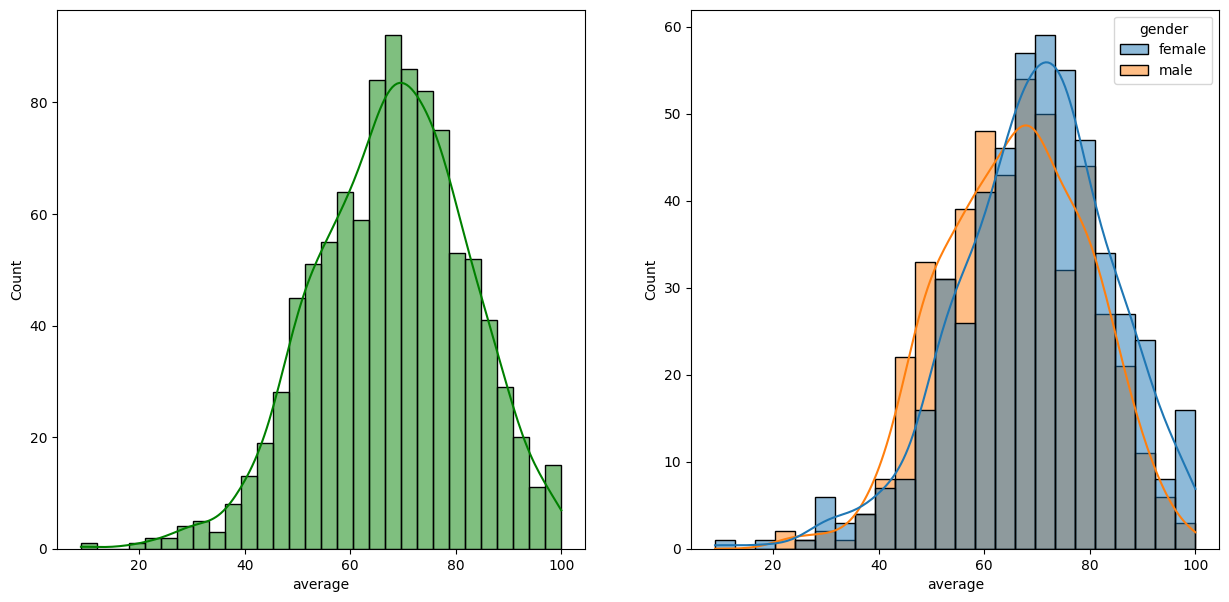

In [15]:
#Histogram
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

INSIGHTS
~Female students tend to perform wel then male studetns

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [20]:
X=df.drop(columns=['total_score','average','math_score'],axis=1)

In [21]:
y=df['math_score']

In [22]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [23]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns 

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoding',oh_transformer, cat_features),
        ('StandardScaler',numeric_transformer, num_features),
    ]
)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 7), (200, 7))

In [25]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [26]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [27]:
#Create an Evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true, predicted)

    return mae,rmse,r2

In [28]:
models= {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor(),
}

model_list = []
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performace for Training set')
    print('RMSE {:.4f}'.format(model_train_rmse))
    print('MAE {:.4f}'.format(model_train_mae))
    print('R2 {:.4f}'.format(model_train_r2))

    print('Model performace for Testing set')
    print('RMSE {:.4f}'.format(model_test_rmse))
    print('MAE {:.4f}'.format(model_test_mae))
    print('R2 {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
     
    

Linear Regression
Model performace for Training set
RMSE 5.3244
MAE 4.2677
R2 0.8743
Model performace for Testing set
RMSE 5.3967
MAE 4.2173
R2 0.8803
Lasso
Model performace for Training set
RMSE 6.5925
MAE 5.2053
R2 0.8072
Model performace for Testing set
RMSE 6.5173
MAE 5.1557
R2 0.8254
Ridge
Model performace for Training set
RMSE 5.3233
MAE 4.2650
R2 0.8743
Model performace for Testing set
RMSE 5.3904
MAE 4.2111
R2 0.8806
K-Neighbors Regressor
Model performace for Training set
RMSE 5.6974
MAE 4.5042
R2 0.8560
Model performace for Testing set
RMSE 7.2172
MAE 5.5880
R2 0.7859
Decision Tree
Model performace for Training set
RMSE 0.2795
MAE 0.0187
R2 0.9997
Model performace for Testing set
RMSE 8.2000
MAE 6.4800
R2 0.7237
Random Forest Regressor
Model performace for Training set
RMSE 2.3267
MAE 1.8507
R2 0.9760
Model performace for Testing set
RMSE 6.0382
MAE 4.6510
R2 0.8502
XGBRegressor
Model performace for Training set
RMSE 1.0073
MAE 0.6875
R2 0.9955
Model performace for Testing set

In [29]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880592
0,Linear Regression,0.880315
5,Random Forest Regressor,0.850169
7,AdaBoost Regressor,0.849403
6,XGBRegressor,0.827797
1,Lasso,0.825446
3,K-Neighbors Regressor,0.785944
4,Decision Tree,0.723677


In [30]:
#We'll go with Linear Regression

lin_model= LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 88.03


Text(0, 0.5, 'Predicted')

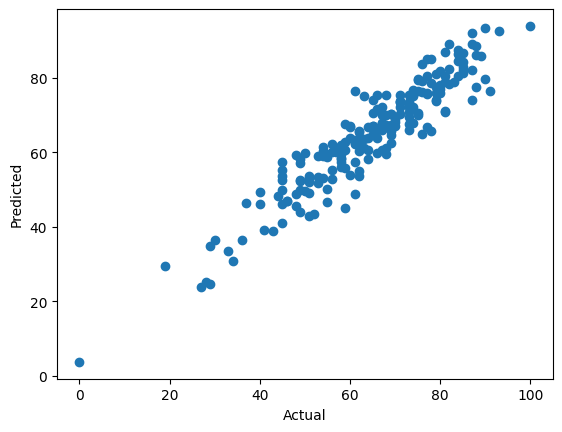

In [31]:
#plot Y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

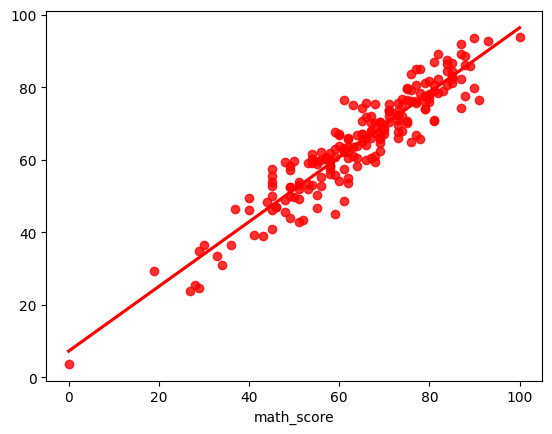

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [35]:
#Difference betweeen Actual and Predicted values
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted Value,Difference
521,91,76.522705,14.477295
737,53,58.951172,-5.951172
740,80,76.921143,3.078857
660,74,76.796143,-2.796143
411,84,87.608154,-3.608154
...,...,...,...
408,52,43.453125,8.546875
332,62,62.070801,-0.070801
208,74,67.997314,6.002686
613,65,67.134033,-2.134033
